Import Necessary Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:

df = pd.read_csv("IRIS.csv")
# Encode species
df["species"] = LabelEncoder().fit_transform(df["species"])

df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df["species"].value_counts()

,count
species,
0,50
1,50
2,50


| Original Species Name | Encoded Value |
| --------------------- | ------------- |
| Iris-setosa           | 0             |
| Iris-versicolor       | 1             |
| Iris-virginica        | 2             |


In [ ]:
import seaborn as sns

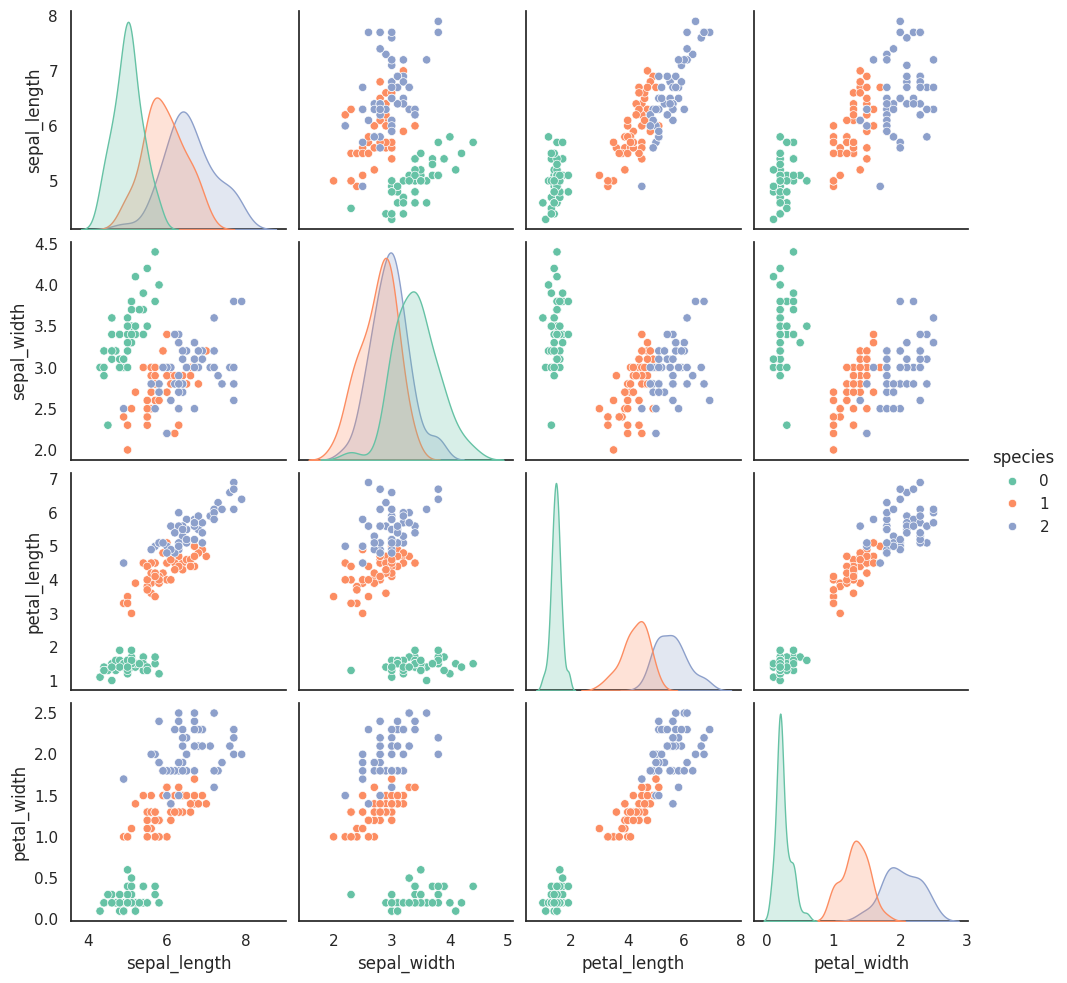

In [ ]:
sns.pairplot(df, hue="species", palette="Set2")


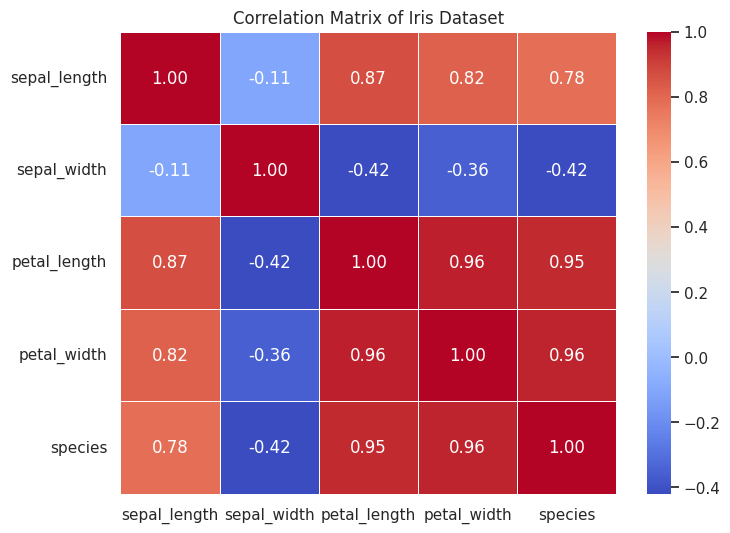

In [ ]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)

plt.title("Correlation Matrix of Iris Dataset")
plt.show()


I remove species (categorical noise for regression) and keep numerical, informative features.

In [ ]:
X = df[["sepal_width", "petal_length", "petal_width"]]
y = df["sepal_length"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

TOL = 0.35   # tolerance for "correct" prediction

Using Euclidean Distance

In [ ]:
knn_euclid_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsRegressor())
])

knn_euclid_grid = {
    "knn__n_neighbors": range(3, 20),
    "knn__weights": ["distance"],
    "knn__p": [2]   # Euclidean distance
}

grid_knn_euclid = GridSearchCV(
    knn_euclid_pipe,
    knn_euclid_grid,
    cv=5,
    scoring="r2"
)

grid_knn_euclid.fit(X_train, y_train)
best_knn_euclid = grid_knn_euclid.best_estimator_

y_pred_knn_euclid = best_knn_euclid.predict(X_test)

mse_knn_euclid = mean_squared_error(y_test, y_pred_knn_euclid)
r2_knn_euclid = r2_score(y_test, y_pred_knn_euclid)
correct_knn_euclid = np.sum(np.abs(y_test - y_pred_knn_euclid) <= TOL)

print("KNN (Euclidean)")
print("Best Params:", grid_knn_euclid.best_params_)
print(f"MSE : {mse_knn_euclid:.4f}")
print(f"R2  : {r2_knn_euclid:.4f}")
print(f"Correct Predictions (±{TOL}): {correct_knn_euclid}/{len(y_test)}")


KNN (Euclidean)
Best Params: {'knn__n_neighbors': 6, 'knn__p': 2, 'knn__weights': 'distance'}
MSE : 0.1069
R2  : 0.8529
Correct Predictions (±0.35): 27/38


RMSE is almost good,it means right model training.

KNN (Manhattan Distance)

In [ ]:
knn_manhattan_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsRegressor())
])

knn_manhattan_grid = {
    "knn__n_neighbors": range(3, 20),
    "knn__weights": ["distance"],
    "knn__p": [1]   # Manhattan distance
}

grid_knn_manhattan = GridSearchCV(
    knn_manhattan_pipe,
    knn_manhattan_grid,
    cv=5,
    scoring="r2"
)

grid_knn_manhattan.fit(X_train, y_train)
best_knn_manhattan = grid_knn_manhattan.best_estimator_

y_pred_knn_manhattan = best_knn_manhattan.predict(X_test)

mse_knn_manhattan = mean_squared_error(y_test, y_pred_knn_manhattan)
r2_knn_manhattan = r2_score(y_test, y_pred_knn_manhattan)
correct_knn_manhattan = np.sum(np.abs(y_test - y_pred_knn_manhattan) <= TOL)

print("KNN (Manhattan) ")
print("Best Params:", grid_knn_manhattan.best_params_)
print(f"MSE : {mse_knn_manhattan:.4f}")
print(f"R2  : {r2_knn_manhattan:.4f}")
print(f"Correct Predictions (±{TOL}): {correct_knn_manhattan}/{len(y_test)}")


KNN (Manhattan) 
Best Params: {'knn__n_neighbors': 7, 'knn__p': 1, 'knn__weights': 'distance'}
MSE : 0.1058
R2  : 0.8544
Correct Predictions (±0.35): 26/38


Euclidean > Manhattan (in this case)

SVM

In [ ]:
svm_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVR(kernel="rbf"))
])

svm_param_grid = {
    "svm__C": [1, 10, 50, 100],
    "svm__gamma": ["scale", 0.1, 0.01],
    "svm__epsilon": [0.05, 0.1]
}

grid_svm = GridSearchCV(
    svm_pipe,
    svm_param_grid,
    cv=5,
    scoring="r2"
)

grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_

y_pred_svm = best_svm.predict(X_test)

mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)
correct_svm = np.sum(np.abs(y_test - y_pred_svm) <= TOL)

print("SVM")
print("Best Params:", grid_svm.best_params_)
print(f"MSE : {mse_svm:.4f}")
print(f"R2  : {r2_svm:.4f}")
print(f"Correct Predictions (±{TOL}): {correct_svm}/{len(y_test)}")


SVM
Best Params: {'svm__C': 100, 'svm__epsilon': 0.1, 'svm__gamma': 0.01}
MSE : 0.1003
R2  : 0.8620
Correct Predictions (±0.35): 29/38


SVM is best model for this iris dataset because R2 is greatest (near about 1 )in this case

In [ ]:
summary = pd.DataFrame({
    "Model": ["KNN (Euclidean)", "KNN (Manhattan)", "SVM"],
    "MSE": [mse_knn_euclid, mse_knn_manhattan, mse_svm],
    "R2": [r2_knn_euclid, r2_knn_manhattan, r2_svm],
    "Correct_Predictions": [
        f"{correct_knn_euclid}/30",
        f"{correct_knn_manhattan}/30",
        f"{correct_svm}/30"
    ]
})

summary


,Model,MSE,R2,Correct_Predictions
0,KNN (Euclidean),0.106874,0.852945,27/30
1,KNN (Manhattan),0.105834,0.854377,26/30
2,SVM,0.100297,0.861996,29/30


In [ ]:
# Accuracy calculation function
def regression_accuracy(y_true, y_pred, tol):
    return np.mean(np.abs(y_true - y_pred) <= tol)

# Compute accuracies
acc_knn_euclid = regression_accuracy(y_test, y_pred_knn_euclid, TOL)
acc_knn_manhattan = regression_accuracy(y_test, y_pred_knn_manhattan, TOL)
acc_svm = regression_accuracy(y_test, y_pred_svm, TOL)

print("Accuracy (KNN Euclidean):", acc_knn_euclid)
print("Accuracy (KNN Manhattan):", acc_knn_manhattan)
print("Accuracy (SVM):", acc_svm)


Accuracy (KNN Euclidean): 0.7105263157894737
Accuracy (KNN Manhattan): 0.6842105263157895
Accuracy (SVM): 0.7631578947368421


It's a regression problem. So **R2** is more important evaluating feature than accuracy

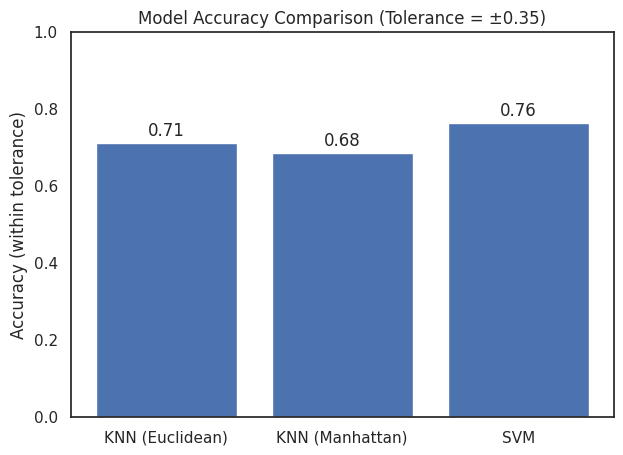

In [ ]:
import matplotlib.pyplot as plt

models = ["KNN (Euclidean)", "KNN (Manhattan)", "SVM"]
accuracies = [acc_knn_euclid, acc_knn_manhattan, acc_svm]

plt.figure(figsize=(7,5))
plt.bar(models, accuracies)

plt.ylabel("Accuracy (within tolerance)")
plt.ylim(0, 1)
plt.title(f"Model Accuracy Comparison (Tolerance = ±{TOL})")

for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.2f}", ha="center")

plt.show()


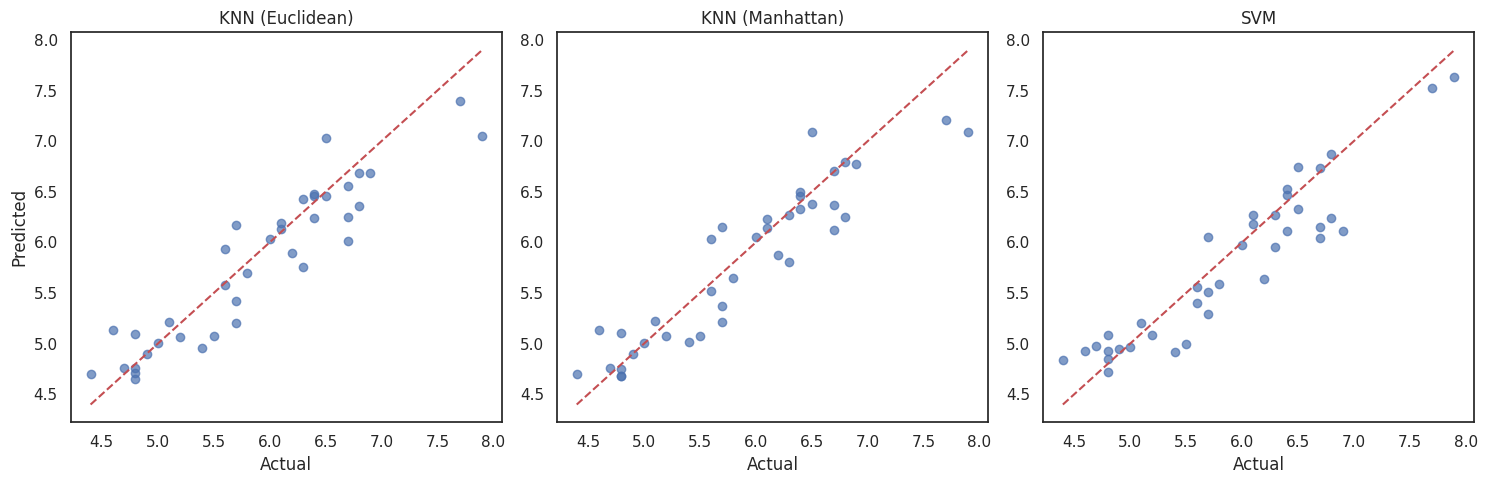

In [ ]:
plt.figure(figsize=(15,5))

# KNN Euclidean
plt.subplot(1,3,1)
plt.scatter(y_test, y_pred_knn_euclid, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         "r--")
plt.title("KNN (Euclidean)")
plt.xlabel("Actual")
plt.ylabel("Predicted")

# KNN Manhattan
plt.subplot(1,3,2)
plt.scatter(y_test, y_pred_knn_manhattan, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         "r--")
plt.title("KNN (Manhattan)")
plt.xlabel("Actual")

# SVM
plt.subplot(1,3,3)
plt.scatter(y_test, y_pred_svm, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         "r--")
plt.title("SVM")
plt.xlabel("Actual")

plt.tight_layout()
plt.show()
